<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *2*: *Classification***

###**Tenggat Waktu: 19 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Tugas2_NPM_Nama.ipynb**. Contoh: A_Tugas2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **19 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Fransisco William Sudianto"
KELAS = "D"
NPM = "2006596535"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fransisco William Sudianto dari kelas D dengan NPM 2006596535, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fransisco William Sudianto)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

## **Dataset**

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range.

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Sumber: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification (dengan modifikasi)

## [25] **Preprocessing**

**Pada bagian ini Anda akan diminta untuk melakukan preprocessing dan eksplorasi data sebelum data digunakan dalam model klasifikasi.**

1\. [3] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

In [67]:
# read data
df = pd.read_csv('mobile_phone.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756,2549.0,9,7,NaN,0,0.0,1.0,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988,2631.0,17,3,7.0,1,1.0,0.0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716,2603.0,11,2,9.0,1,1.0,0.0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786,2769.0,16,8,11.0,1,0.0,0.0,2
4,1821,1,1.2,0,13,1,44.0,NaN,141,2,...,1208,1212,1411.0,8,2,15.0,1,1.0,0.0,1


In [68]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2021 non-null   int64  
 1   blue           2021 non-null   int64  
 2   clock_speed    1920 non-null   float64
 3   dual_sim       2021 non-null   int64  
 4   fc             2021 non-null   int64  
 5   four_g         2021 non-null   int64  
 6   int_memory     1915 non-null   float64
 7   m_dep          1928 non-null   float64
 8   mobile_wt      2021 non-null   int64  
 9   n_cores        2021 non-null   int64  
 10  pc             2021 non-null   int64  
 11  px_height      2021 non-null   int64  
 12  px_width       2021 non-null   int64  
 13  ram            1927 non-null   float64
 14  sc_h           2021 non-null   int64  
 15  sc_w           2021 non-null   int64  
 16  talk_time      1937 non-null   float64
 17  three_g        2021 non-null   int64  
 18  touch_sc

In [19]:
# deskripsi data
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2021.000000,2021.000000,1920.000000,2021.000000,2021.000000,2021.000000,1915.000000,1928.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,1927.000000,2021.000000,2021.000000,1937.000000,2021.000000,1925.000000,1922.000000,2021.000000
mean,1239.205344,0.492331,1.521302,0.505690,4.303810,0.523998,32.086162,0.501556,140.272143,4.532905,...,646.858981,1249.240970,2120.320187,12.323602,5.790203,11.022716,0.762494,0.504935,0.506243,1.503216
std,439.916748,0.500065,0.816020,0.500091,4.330382,0.499547,18.198040,0.289261,35.393281,2.291511,...,445.159739,433.141437,1079.774853,4.213155,4.369054,5.459042,0.425660,0.500106,0.500091,1.114537
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,874.000000,1210.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,567.000000,1245.000000,2130.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1617.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.000000,1633.000000,3033.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [20]:
# cek jumlah missing value 
print("Jumlah data yang memiliki missing value setiap kolom")
print(df.isnull().sum())
print("Shape data")
print(df.shape)

Jumlah data yang memiliki missing value setiap kolom
battery_power      0
blue               0
clock_speed      101
dual_sim           0
fc                 0
four_g             0
int_memory       106
m_dep             93
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram               94
sc_h               0
sc_w               0
talk_time         84
three_g            0
touch_screen      96
wifi              99
price_range        0
dtype: int64
Shape data
(2021, 21)


In [69]:
# jumlah duplikat pada data
print("Jumlah duplikasi data :", df.duplicated().sum())

Jumlah duplikasi data : 21


In [70]:
# mengecek keberadaan outlier
df_2.boxplot(vert=False,figsize=(20,20))

<AxesSubplot: >

2\. [3] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil klasifikasi yang maksimal.

In [71]:
# drop duplikasi data
df_2 = df.drop_duplicates(inplace = False)
print("Jumlah duplikasi data :", (df_2.duplicated().sum()))

Jumlah duplikasi data : 0


In [72]:
# cek bagaimana distribusi setiap data yang memiliki missing values
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        return "Tidak ditemukan missing value pada dataset"
        
    else:
        return missing_data[missing_data['Total'] > 0]

df_null = cek_null(df_2)

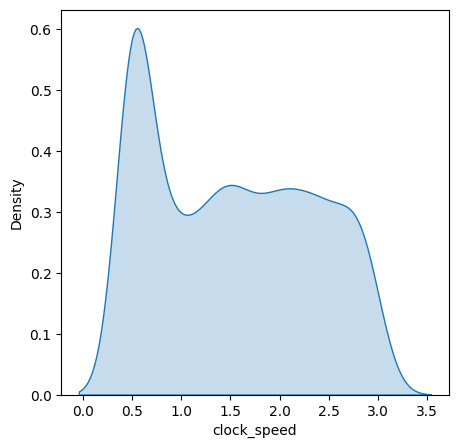

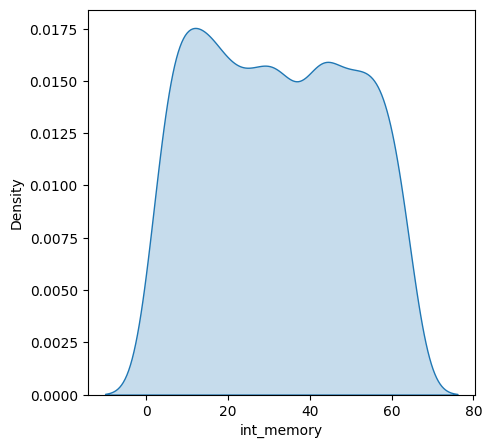

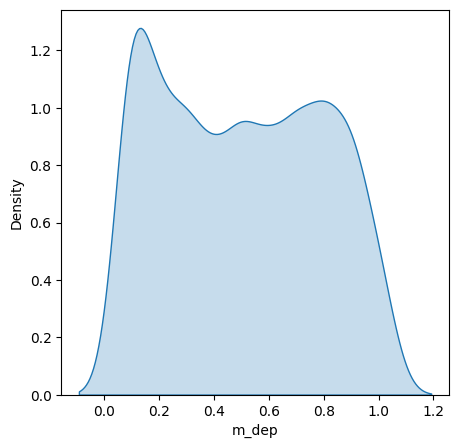

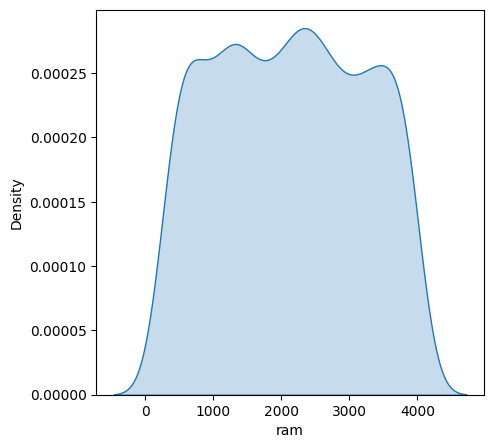

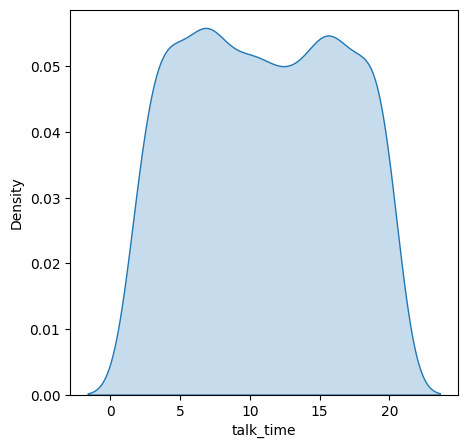

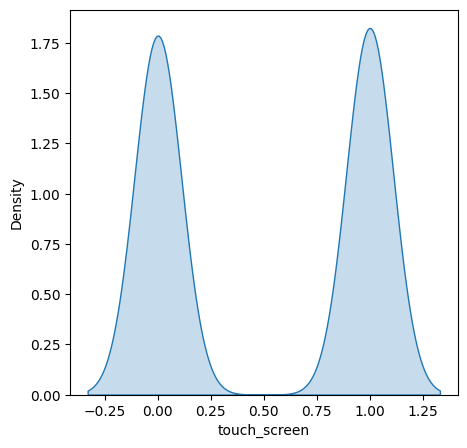

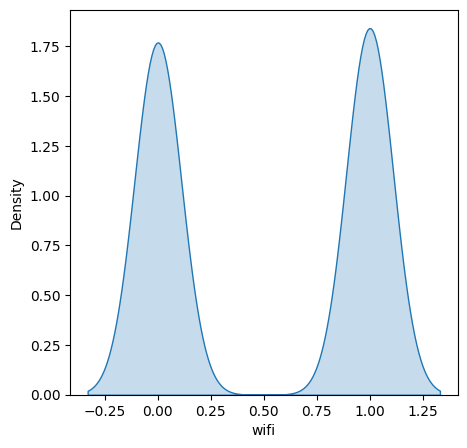

In [75]:
import seaborn as sns
col_na = [i for i in df_2 if df_2[i].isnull().any()]
for i in col_na :
    plt.figure(figsize=(5,5))
    sns.kdeplot(df_2[i], fill=True)
    plt.show()

In [76]:
# berdasarkan bentuk distribusi, hampir semua distribusi data yang memiliki null values berbentuk normal,
# kecuali untuk touch_screen dan wifi karena datanya beruba 0 dan 1, oleh karena itu kita bisa mengisi null values
# dengan mean dan modus
df_clean = df_2.copy()
for i in range(0, len(col_na)-2) :
    mean = df_2[col_na[i]].mean()
    df_clean[col_na[i]].fillna(value=mean, inplace=True)

for j in range(len(col_na)-2, len(col_na)):
    modus = df_2[col_na[j]].mode()[0]
    df_clean[col_na[j]].fillna(value=modus, inplace=True)

df_clean.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Karena data memiliki outliers yang sedikit dan nilainya tidak terlalu berpengaruh pada data, maka outliers bisa diabaikan atau dibiarkan.

3\. [3] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!


> Jawaban: normalisasi diperlukan atau tidak bergantung pada apa model yang akan digunakan untuk mengolah data. apabila menggunakan decision tree, random forest, dan naive bayes, kita tidak perlu menggunakan normalisasi, tetapi untuk KNN, kita biasanya perlu melakukan normalisasi, tetapi pada kasus ini, setelah dicoba, normalisasi justru membuat akurasi pada model KNN berkurang, sehingga tidak perlu melakukan normalisasi. 

> 

4\. [10] Sebelum data diproses lebih lanjut lakukan *feature selection* dengan memilih beberapa fitur yang paling optimal untuk mengklasifikasikan label target!

In [77]:
# pisahkan data
X_raw = df_clean.drop(["price_range"], axis=1)
y = df_clean["price_range"]

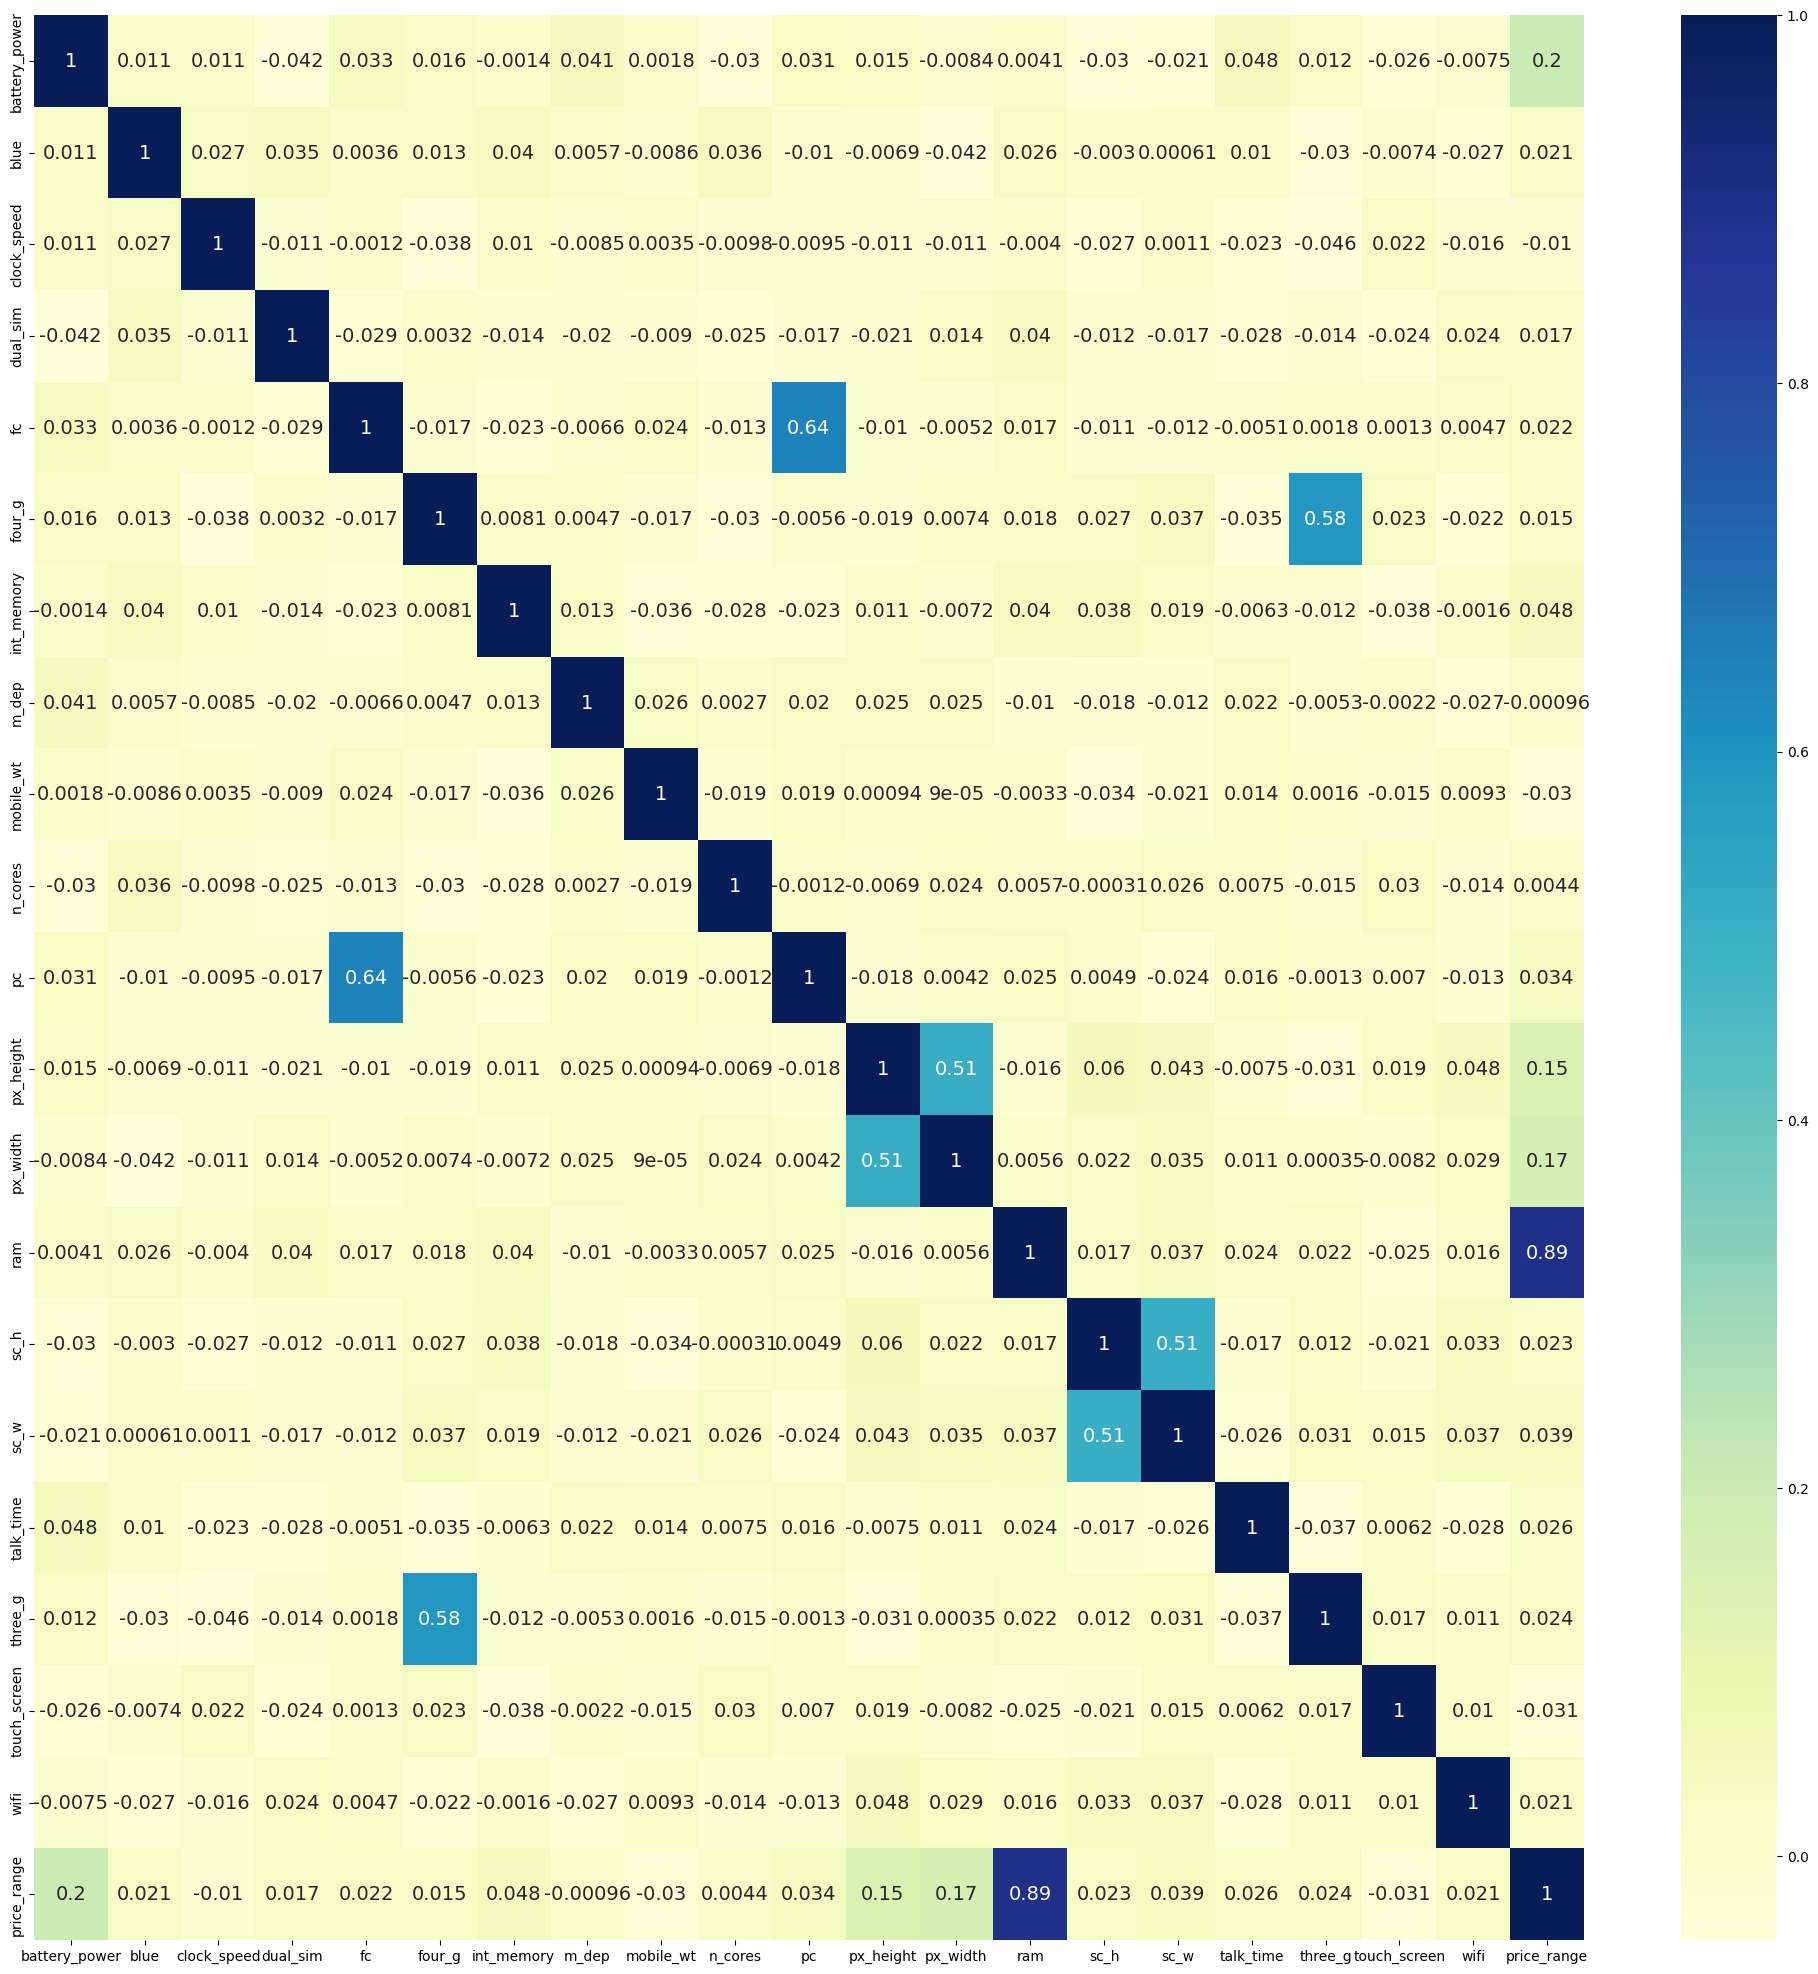

In [88]:
features = list(df_clean.columns[0:21])
plt.figure(figsize=(25,25))
sns.heatmap(df_clean[features].corr(method="pearson"), xticklabels=features, yticklabels=features, annot_kws={'size': 14}, cmap="YlGnBu", annot=True)
plt.show()

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=4) 
X = selector.fit_transform(X_raw, y)
input_features = selector.feature_names_in_
selected = selector.get_feature_names_out(input_features=input_features)
print(selected)

['battery_power' 'px_height' 'px_width' 'ram']


5\. [6] Apa saja fitur-fitur yang terpilih hasil dari *feature selection*? Jelaskan strategi Anda dalam memilih fitur-fitur tersebut dan berikan analisis mengapa fitur tersebut cocok digunakan untuk mengklasifikasi label target!

> Jawaban: Berdasarkan heatmap, fitur-fitur yang memiliki korelasi tinggi terhadap price_range adalah battery_power, px_height, px_width, dan ram. Oleh karena itu, kita akan memilih keempat fitur tersebut. Apabila menggunakan library SelectKBest dengan k=4, ternyata juga mendapatkan hasil yang sama, oleh karena itu kita akan mengguakan keempat fitur tersebut.

> 

## [75] **Classification**

**Pada bagian ini Anda akan diminta untuk melakukan klasifikasi harga suatu mobile phone berdasarkan fitur-fitur yang sudah Anda pilih sebelumnya. Anda akan mencoba berbagai macam model klasifikasi seperti Decision Tree, Random Forest, Naive Bayes, dan K-nearest Neighbors untuk mencari model yang memiliki performa terbaik.**

### [3] Preparation

6\. [3] Buatlah model K-Fold Cross Validation yang akan digunakan untuk membagi dataset train dan test menjadi beberapa bagian (*fold*). Strategi ini akan Anda gunakan pada semua *classifier* dibandingkan dengan strategi sebelumnya yang hanya membagi data ke dalam data training dan testing menggunakan method `train_test_split`.

In [147]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

X_selected = X_raw[[i for i in selected]]
X_selected
x_val = X_selected.values
y_val = y.values

kf = KFold(n_splits=5)
kf.get_n_splits(x_val)

kf.split(x_val, y_val)

print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


### [19] Decision Tree

7\. [4] Implementasikan model Decision Tree tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [150]:
dt_classifier = DecisionTreeClassifier()
scores = cross_val_score(dt_classifier, x_val, y_val, scoring='accuracy', cv=kf)
print('Model Accuracy :', np.mean(scores))

Model Accuracy : 0.8310000000000001


8\. [4] Implementasikan model Decision Tree dengan memberikan parameter nilai `min_samples_leaf=50`; serta berikan hasil evaluasinya!

In [151]:
dt_classifier_2 = DecisionTreeClassifier(min_samples_leaf=50)
scores = cross_val_score(dt_classifier_2, x_val, y_val, scoring='accuracy', cv=kf)
print('Model Accuracy :', np.mean(scores))

Model Accuracy : 0.7685


9\. [6] Bandingkan model yang dibuat pada soal nomor 7 dan nomor 8, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: Model nomor 7 memiliki hasil akurasi sekitar 83%, sedangkan model nomor 8 memiliki akurasi sekitar 77%, artinya model nomor 7 lebih baik atau lebih akurat dibandingkan model nomor 8. Yang membedakan model nomor 7 dan model nomor 8 adalah pada bagian parameter yang digunakan, yaitu min_samples_leaf = 50. min_samples_leaf sendiri artinya adalah jumlah minimun data atau sample dalam sebuah leaf. nilai min_samples_leaf yang besar artinya harus ada minimal banyak data dalam sebuah leaf sebelum leaf tersebut bisa memiliki child. Artinya, min_samples_leaf = 50 membuat model menjadi kurang baik karena nilainya terlalu besar. parameter tersebut membuat model kita menjadi underfitting.

> 

10\. [5] Buatlah model yang memiliki performa yang lebih bagus dibanding kedua model sebelumnya! Anda dibebaskan untuk melakukan eksplorasi dalam mengkonfigurasi parameter yang dipakai.

In [170]:
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split': [5, 10, 15, 20, 25, 30],
                'max_depth' : [5, 15, 20, 30, 40, 50],
                'criterion': ["gini", "entropy", "log_loss"]}

dt_classifier_2 = DecisionTreeClassifier()

clf = GridSearchCV(estimator=dt_classifier_2, 
                    param_grid=param_grid, cv= 5, scoring='accuracy')
clf.fit(x_val, y_val)
print("best param :", clf.best_params_)
clf_best = DecisionTreeClassifier(**clf.best_params_)
clf_score_best = cross_val_score(clf_best, x_val, y_val, cv=kf)

print(f'Average score: {"{:.4f}".format(clf_score_best.mean())}')

best param : {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 5}
Average score: 0.8335


### [18] Random Forest

11\. [4] Implementasikan model Random Forest tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [185]:
from sklearn.ensemble import RandomForestClassifier

# Melakukan training pada model random forest
rf_md = RandomForestClassifier()
rf_score = cross_val_score(rf_md, x_val, y_val, cv=kf)
print(f'Average score: {"{:.4f}".format(rf_score.mean())}')

Average score: 0.8720


12\. [8] Implementasikan model Random Forest dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [188]:
param_grid = {'min_samples_split': [5, 10, 15, 20, 25, 30],
                'max_depth' : [5, 15, 20, 30, 40, 50],
                'max_leaf_nodes' : [30, 40, 50, 60, 75, 100],
                'criterion': ["gini", "entropy"]}

rf_classifier = RandomForestClassifier()

rf_clf = GridSearchCV(estimator=rf_classifier, 
                    param_grid=param_grid, cv= 5, scoring='accuracy')
rf_clf.fit(x_val, y_val)
print("best param :", rf_clf.best_params_)
rf_clf_best = RandomForestClassifier(**rf_clf.best_params_)
rf_clf_score_best = cross_val_score(rf_clf_best, x_val, y_val, cv=kf)

print(f'Average score: {"{:.4f}".format(rf_clf_score_best.mean())}')

best param : {'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 100, 'min_samples_split': 5}
Average score: 0.8750


13\. [6] Bandingkan model yang dibuat pada soal nomor 11 dan nomor 12, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: model nomor 11 memiliki akurasi sebesar sekitar 87.2%, sedangkan model nomor 12 memiliki akurasi sebesar 87.5%. Hal ini berarti proses hyperparameter tunning yang dilakukan berhasil membuat akurasinya bertambah, meskipun hanya sedikit. Parameter terbaik yang teridentifikasi adalah criterion : entrophy, max_depth : 15, max_leaf_nodes : 100, min_samples_split : 5. Parameter-parameter ini berhasil menambah akurasi, hanya saja nilainya sedikit, artinya parameter yang disebutkan diatas masih bisa lebih diperbaiki lagi. Bisa disimpulkan bahwa kita harus bisa mengatur parameter yang digunakan dengan cermat agar model kita memiliki akurasi yang makin besar. Kita juga bisa menambah atau menghapus parameter yang digunakan, karena banyak kemungkinan yang masih bisa dicoba dalam menentukan parameter terbaik. 

> 


### [16] Naive Bayes

14\. [4] Implementasikan model dari salah satu variasi Naive Bayes; serta berikan hasil evaluasinya!

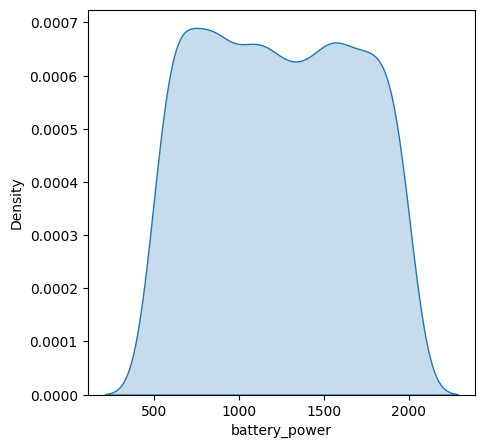

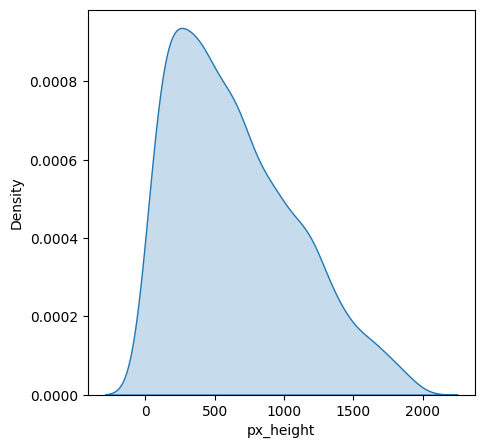

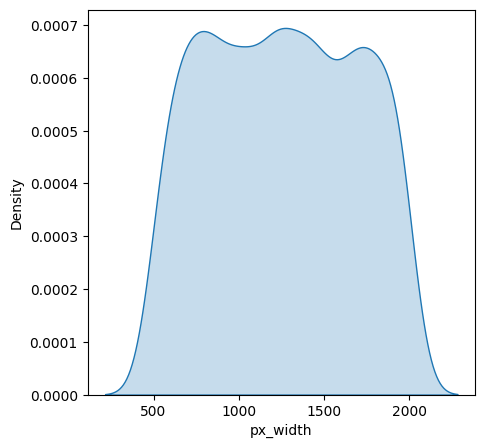

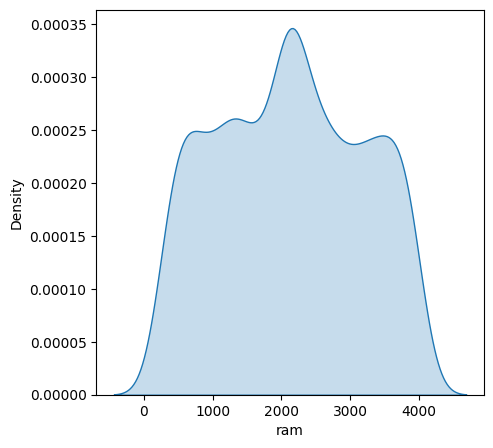

In [196]:
for i in selected:
    plt.figure(figsize=(5,5))
    sns.kdeplot(X_selected[i], fill=True)
    plt.show()

In [198]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
modelnb_score = cross_val_score(modelnb, x_val, y_val, cv=kf)
print(f'Average score: {"{:.4f}".format(modelnb_score.mean())}')

Average score: 0.7770


15\. [6] Apa alasan dan pertimbangan Anda dalam memilih variasi tersebut dibandingkan variasi Naive Bayes lainnya? 

> Jawaban: karena variasi Gaussian Naive Bayes sesuai dengan tipe data dan distribusi datanya, dimana tipe data yang digunakan sifatnya kontinu dan distribusinya normal, sesuai dengan visualisasi yang dihasilkan.

> 

16\. [6] Masing-masing variasi Naive Bayes dibuat khusus untuk menyesuaikan tipe data tertentu pada data yang digunakan. Jika data yang ada memiliki tipe fitur yang bervariasi (numerik, biner, kategorik, dll), apakah kita bisa menggunakan salah satu variasi algoritma saja? Bagaimana strategi Anda dalam menganani kasus tersebut?

> Jawaban: bisa, kita bisa mengubah data-data kategorik menjadi data numerik dengan melakukan pengubahan, misalnya one-hot encoding, dan lain-lain. kita perlu menentukan variasi yang terbaik dengan cara melakukan uji coba terhadap variasi-variasi yang ada, lalu kita juga harus memperhatikan bentuk distribusinya, sesuaikan dengan ciri-ciri setiap variasi naive bayes.

> 

### [12] K-nearest Neighbors

17\. [4] Implementasikan model KNN dengan memberikan parameter nilai `n_neighbors=3`; serta berikan hasil evaluasinya!

In [204]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn_score = cross_val_score(model_knn, x_val, y_val, cv=kf)

print(f'Average score: {"{:.4f}".format(model_knn_score.mean())}')

Average score: 0.8675


18\. [8] Implementasikan model KNN dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [208]:
model = KNeighborsClassifier()

# parameter yang akan di tunning
tunned_params = [
  { 
    'n_neighbors': [i for i in range(1, 20)]
  } 
]

print("##### Tuning hyper-parameters model KNN #####")
print()

clfKNN = GridSearchCV(model, 
                    tunned_params,
                    scoring="accuracy",
                    cv=kf,
                    verbose = 2
                    )

clfKNN.fit(x_val, y_val)

print("Best parameters set found on development set:")
print()
print(clfKNN.best_params_)
score = cross_val_score(clfKNN, x_val, y_val, cv=kf)
print(f'Average score: {"{:.4f}".format(score.mean())}')

##### Tuning hyper-parameters model KNN #####

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[

### [7] Analisis

19\. [7] Dari keempat variasi model (Decision Tree, Random Forest, Naive Bayes, dan KNN) yang sudah Anda coba, manakah model yang memiliki performa terbaik? Berikan analisis Anda!

> Jawaban: Berdasarkan hasil percobaan, decision tree memiliki akurasi sekitar 83%, random forest memiliki akurasi sebesar 87%, naive bayes memiliki akurasi sekitar 78%, dan KNN memiliki akurasi sebesar 89%, artinya model terbaik ada pada model KNN. Menurut saya, KNN memiliki akurasi yang tinggi karena dataset yang digunakan tidak terlalu besar, lalu skala datanya juga cukup berkelompok, artinya data yang memiliki nilai besar dan kecil cukup terpisah, sehingga KNN dapat menentukan class-class terdekat dengan cukup akurat. 

> 